In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import tqdm
import math
from models import RNN, LSTM  # models.py에서 RNN, LSTM 모델 가져오기
from dataset import StockDataset  # dataset.py에서 KOSPI 데이터 가져오기
from torch.utils.data import DataLoader

# stock_file = './KOSPI.csv'
stock_file = 'KOSPI.csv'
# loadckpt = './KOSPI_TRANSFORMER/checkpoint_010.ckpt'
loadckpt = 'KOSPI_LSTM/checkpoint_010.ckpt'
# plotdir = './KOSPI_TRANSFORMER'
plotdir = 'KOSPI_TRANSFORMER'

In [32]:
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\주식'

In [46]:
def eval_plot():

    # 데이터 셋 설정
    dataset_test = StockDataset(file_path = stock_file, time_step = 10, train_flag=False)  # 평가 단계이므로 train_flag=False
    test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)
    loader = tqdm.tqdm(test_loader)

    # RNN, LSTM 중 원하는 모델 설정
    model = RNN(rnn_layer=2, input_size=1, hidden_size=4)
    model = LSTM(lstm_layer=2, input_dim=1, hidden_size=8)

    model.load_state_dict(torch.load(loadckpt))  # 학습 시 저장한 checkpoints 불러오기

    preds = []
    labels = []

    for idx, (data, label) in enumerate(loader):
        data, label = data.float(), label.float()
        output = model(data)  # batch_size(64) 별로 전체 데이터를 나누어서 평가 진행
        preds += (output.detach().tolist())  # 예측값 preds를 리스트에 추가
        labels += (label.detach().tolist())  # 정닶값 label을 리스트에 추가

    fig, ax = plt.subplots()
    data_x = list(range(len(preds)))

    ax.plot(data_x[-60:], preds[-60:], label='predict', color='red')  # 빨간색으로 예측값 lineplot 생성
    ax.plot(data_x[-60:], labels[-60:],label='ground truth', color='blue')  # 파란색으로 정답값 lineplot 생성
    plt.legend()
    plt.savefig('{}/KOSPI_TRANSFORMER_epoch_010.png'.format(plotdir))  # 각 figure를 png 형태로 저장
    plt.show()


data len:1102


100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 200.38it/s]


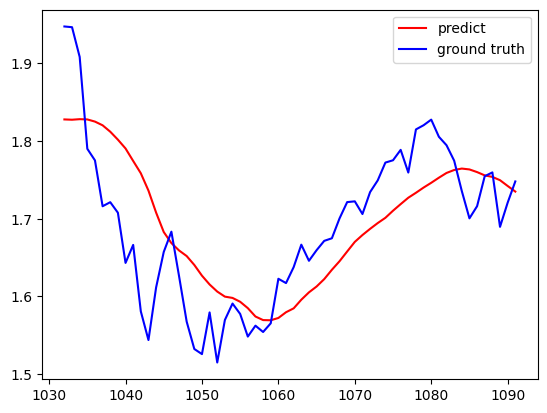

In [47]:
if __name__ == '__main__':
    eval_plot()

In [48]:
import glob

In [57]:
loadckpts = glob.glob('KOSPI_LSTM/*.ckpt')

In [58]:
loadckpts

['KOSPI_LSTM\\checkpoint_000.ckpt',
 'KOSPI_LSTM\\checkpoint_010.ckpt',
 'KOSPI_LSTM\\checkpoint_020.ckpt',
 'KOSPI_LSTM\\checkpoint_030.ckpt',
 'KOSPI_LSTM\\checkpoint_040.ckpt',
 'KOSPI_LSTM\\checkpoint_050.ckpt',
 'KOSPI_LSTM\\checkpoint_060.ckpt',
 'KOSPI_LSTM\\checkpoint_070.ckpt',
 'KOSPI_LSTM\\checkpoint_080.ckpt',
 'KOSPI_LSTM\\checkpoint_090.ckpt',
 'KOSPI_LSTM\\checkpoint_100.ckpt']

In [59]:
def eval_plot2(loadckpt, png_name):

    # 데이터 셋 설정
    dataset_test = StockDataset(file_path = stock_file, time_step = 10, train_flag=False)  # 평가 단계이므로 train_flag=False
    test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False)
    loader = tqdm.tqdm(test_loader)

    # RNN, LSTM 중 원하는 모델 설정
    model = RNN(rnn_layer=2, input_size=1, hidden_size=4)
    model = LSTM(lstm_layer=2, input_dim=1, hidden_size=8)

    model.load_state_dict(torch.load(loadckpt))  # 학습 시 저장한 checkpoints 불러오기

    preds = []
    labels = []

    for idx, (data, label) in enumerate(loader):
        data, label = data.float(), label.float()
        output = model(data)  # batch_size(64) 별로 전체 데이터를 나누어서 평가 진행
        preds += (output.detach().tolist())  # 예측값 preds를 리스트에 추가
        labels += (label.detach().tolist())  # 정닶값 label을 리스트에 추가

    fig, ax = plt.subplots()
    data_x = list(range(len(preds)))

    ax.plot(data_x[-60:], preds[-60:], label='predict', color='red')  # 빨간색으로 예측값 lineplot 생성
    ax.plot(data_x[-60:], labels[-60:],label='ground truth', color='blue')  # 파란색으로 정답값 lineplot 생성
    plt.legend()
    plt.savefig('{}/{}'.format(plotdir, png_name))  # 각 figure를 png 형태로 저장
    plt.show()


# KOSPI_TRANSFORMER_epoch_010.png

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 201.60it/s]


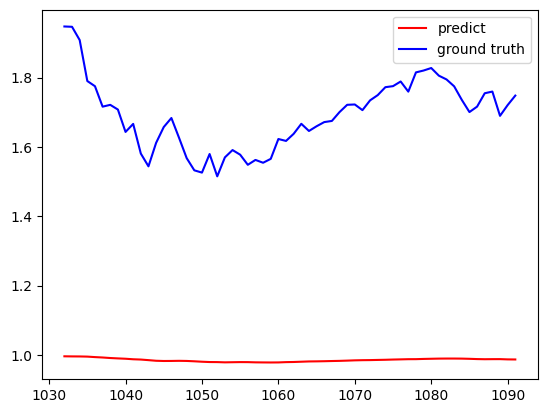

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 200.87it/s]


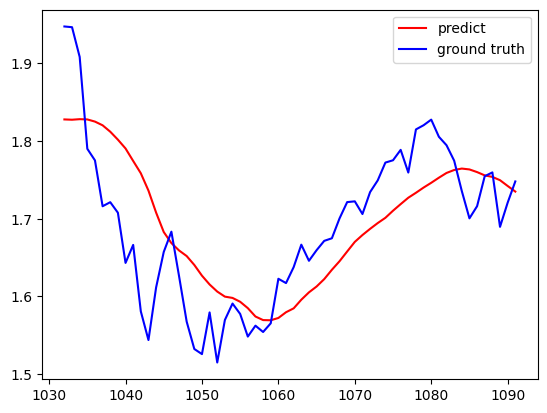

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 203.91it/s]


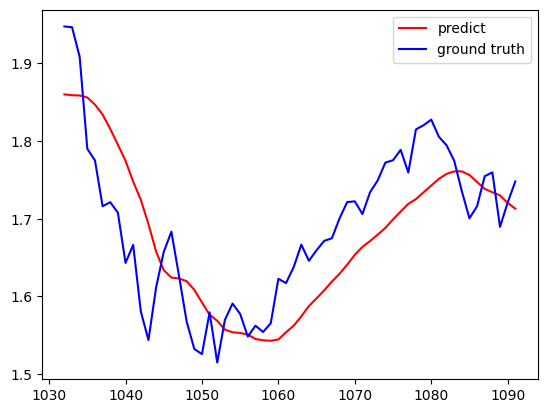

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 158.11it/s]


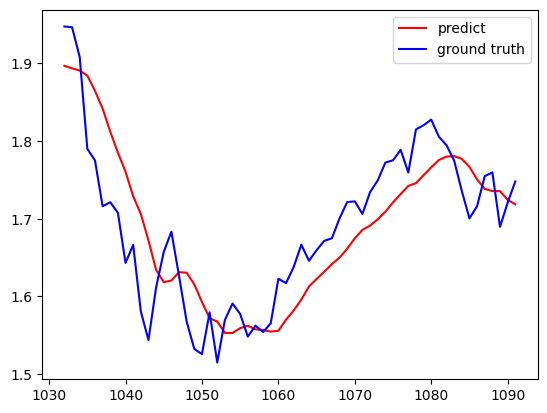

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 191.11it/s]


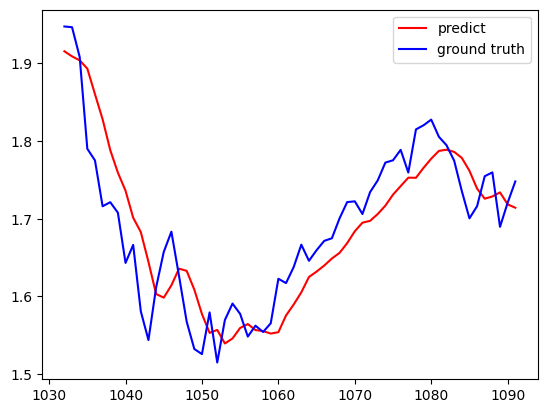

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 149.61it/s]


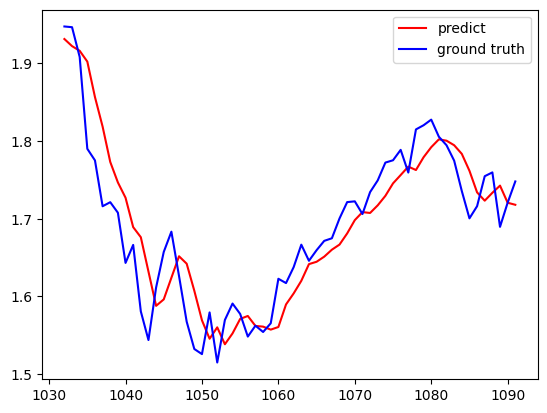

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 196.03it/s]


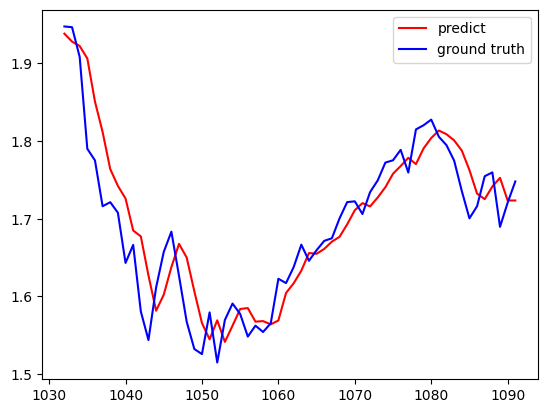

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 113.54it/s]


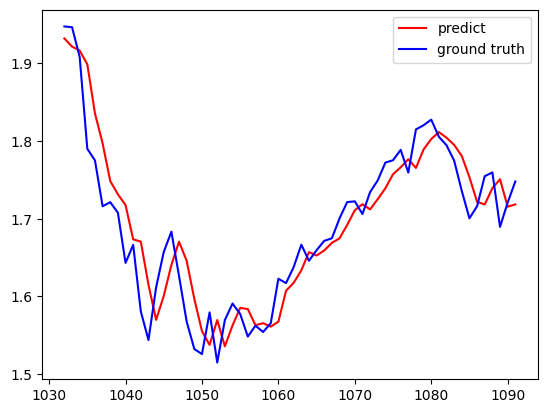

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 152.58it/s]


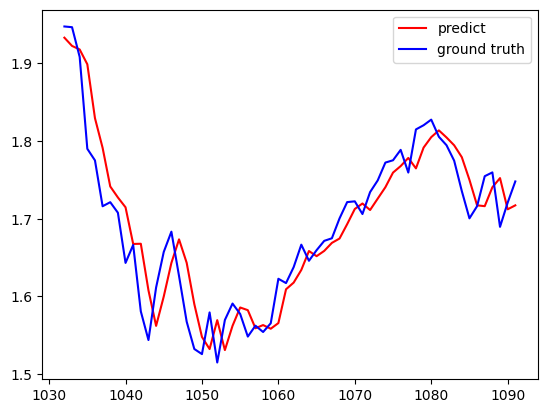

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 157.46it/s]


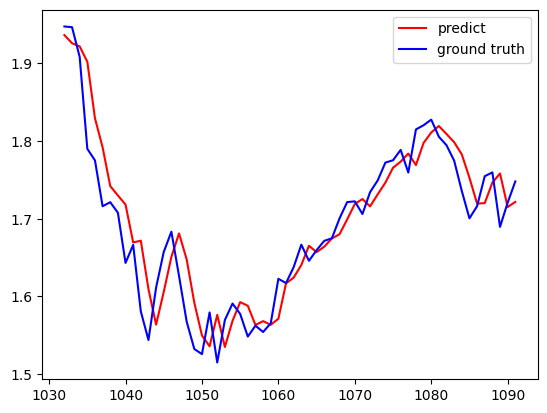

data len:1102



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 147.36it/s]


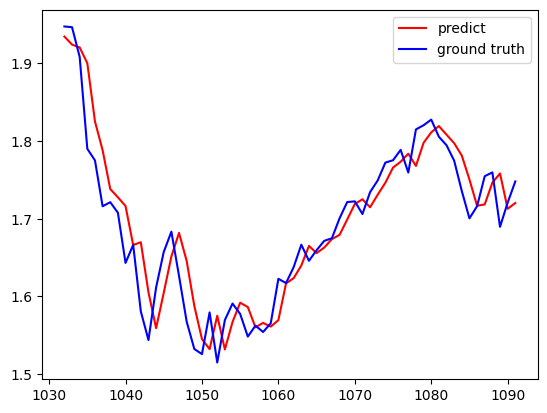

In [60]:
for loadckpt in loadckpts:
    png_name = loadckpt.split('\\')[-1].split('.')[0]+'png'
    eval_plot2(loadckpt, png_name)